# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

## ImageAnalysis3 and basic modules

In [2]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
from ImageAnalysis3 import *
from ImageAnalysis3.classes import _allowed_kwds

import h5py
import ast
import pandas as pd

print(os.getpid())

444


## Chromatin_analysis_tools etc

See **functions** in the repository for [AnalysisTool_Chromatin](../../README.md)

In [3]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

# Define folders

In [4]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'chromosome_scaling')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\chromosome_scaling\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\chromosome_scaling\figures.


# Plotting parameters

In [5]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [6]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5


## cell type color-codess

In [7]:
# cell labels from RNA-MERFISH and celltype prediction
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]
# cell palette from RNA-MERFISH UMAP and stats
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}


In [8]:
# this is the plotting order noted based on the snRNA transcriptional acitivty if needed
sorted_cellplot_order_byRNA = ['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 'Vip', 'Lamp5',
                  'L5/6 NP', 'Sst', 'Sncg', 'Pvalb', 'L4/5 IT', 'L6 CT',
                  'L6 IT', 'L6b', 'L2/3 IT', 'L5 IT', 'L5 ET']

# Load data relevant information

## load and format codebook

[merged codebook](../resources/merged_codebook.csv) as in the repository (merged for all DNA-MERFISH libraries)

In [9]:
# Load codebook 
codebook_fname = os.path.join(input_folder,'merged_codebook.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df by chr and chr_order
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)
codebook_df.head()

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_479,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604
0,1:3742742-3759944,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1:6245958-6258969,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1:8740008-8759916,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,1:9627926-9637875,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,1:9799472-9811359,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
# Format the chr loci name by 
# 1. changing loci name format
# 2. extract relevant information such as id, chr, chr_order, and library etc
from gene_to_loci import loci_pos_format
loci_name_list = list(map(loci_pos_format, codebook_df['name'].tolist()))
loci_name_arr = np.array(loci_name_list)

# convert to a new dataframe and set loci name as index
codebook_df = codebook_df[['name','id','chr','chr_order','library']]
codebook_df['loci_name'] = list(loci_name_arr[:,0])
codebook_df = codebook_df.set_index ('loci_name')

codebook_df.head()

,name,id,chr,chr_order,library
loci_name,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0.0,CTP11
chr1_6245958_6258969,1:6245958-6258969,2,1,1.0,CTP11
chr1_8740008_8759916,1:8740008-8759916,3,1,2.0,CTP11
chr1_9627926_9637875,1:9627926-9637875,1,1,3.0,CTP13
chr1_9799472_9811359,1:9799472-9811359,2,1,4.0,CTP13


# Load spatial distance from matrices

In [11]:
# Load class_2_median
# class to median distance dict
class_2_median_filename = os.path.join(input_folder, 'subclass_2_medianDict.pkl')

class_2_medianDict = pickle.load(open(class_2_median_filename, 'rb'))
print(class_2_medianDict.keys())

dict_keys(['Oligo', 'L5 IT', 'Micro', 'Peri', 'Endo', 'Astro', 'OPC', 'L6 CT', 'L5 ET', 'L5/6 NP', 'Pvalb', 'L6 IT', 'Lamp5', 'L6b', 'Sst', 'SMC', 'L4/5 IT', 'L2/3 IT', 'Vip', 'Sncg', 'VLMC'])


In [12]:
class_2_info_filename = os.path.join(input_folder, 'subclass_2_cellInfo.pkl')
class_2_infoDict = pickle.load(open(class_2_info_filename, 'rb'))

# inspect cell numbers for quality control
sel_class_list = []
for _cls, _info_list in class_2_infoDict.items():
    #print(_cls, len(_info_list))
    # include most cell types with abundant number; remove Peri because no snRNAseq data
    if len(_info_list) > len(class_2_infoDict['Peri']): 
        sel_class_list.append(_cls)
        
np.array(sel_class_list)

array(['Oligo', 'L5 IT', 'Micro', 'Endo', 'Astro', 'OPC', 'L6 CT',
       'L5 ET', 'Pvalb', 'L6 IT', 'L6b', 'Sst', 'L4/5 IT', 'L2/3 IT'],
      dtype='<U7')

# Load locus RNA level

In [13]:
import tqdm

rna_analysis_folder = r'L:\Shiwei\postanalysis_2024\v0\locus_annotation\analysis'

#sel_class_list = transAB_ratio_summary.columns
ref_measure_dict_byGroup = {}

for _class in tqdm.tqdm(sel_class_list):
    _class_name = _class.replace(' ','_').replace('/','_')
    #print(_class_name)
    rna_atac_fname = os.path.join(rna_analysis_folder,f'subclass_{_class_name}_snATAC_snRNA_mean_by_loci.csv')
    if os.path.exists(rna_atac_fname):
        rna_atac_df = pd.read_csv(rna_atac_fname,index_col=1)
        ref_measure_dict_byGroup[_class] = rna_atac_df[:-1]

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 58.33it/s]


# Make locus assignment by ATAC/RNA value

In [14]:
#rna_summary_df = pd.DataFrame(index = rna_df_dict['L2/3 IT'].index)
rna_summary_dict = {'rna':[],'atac':[],
                    'loci':[],'celltype':[],'chr':[]}
for _group, _rna_df in ref_measure_dict_byGroup.items():
    rna_summary_dict['rna'].extend(_rna_df['mean_rna_2X_2000kb'].tolist())
    if 'mean_ATAC_2X_2000kb' in _rna_df.columns:
        rna_summary_dict['atac'].extend(_rna_df['mean_ATAC_2X_2000kb'].tolist())
    else: # some celltype does not have atac
        rna_summary_dict['atac'].extend([np.nan]*len(_rna_df))
    rna_summary_dict['loci'].extend(_rna_df.index.tolist())
    rna_summary_dict['celltype'].extend([_group]*len(_rna_df))
    rna_summary_dict['chr'].extend([i.split('_')[0] for i in _rna_df.index.tolist()])

rna_summary_df = pd.DataFrame(rna_summary_dict)
rna_summary_df

,rna,atac,loci,celltype,chr
0,2.923077,1.850186,chr1_3742742_3759944,Oligo,chr1
1,17.216783,2.510552,chr1_6245958_6258969,Oligo,chr1
2,3.748252,2.366535,chr1_8740008_8759916,Oligo,chr1
3,3.503497,2.211735,chr1_9627926_9637875,Oligo,chr1
4,3.503497,2.240492,chr1_9799472_9811359,Oligo,chr1
...,...,...,...,...,...
27729,10.249658,4.179515,chrX_163750534_163758706,L2/3 IT,chrX
27730,14.375482,5.022782,chrX_166247682_166259932,L2/3 IT,chrX
27731,32.618177,5.091130,chrX_167157164_167167452,L2/3 IT,chrX
27732,21.168221,4.320996,chrX_168746045_168757590,L2/3 IT,chrX


## group locus pairs

In [15]:
## Function for AB or equivalent squareform
def pairwise_AB_str_map (AB_str_list, all_combinations):
    """
    Generate all pairwise concatenations of string elements in a list.
    """
    n = len(AB_str_list)
    result = []
    for i in range(n):
        for j in range(i+1, n):
            # Concatenate strings at positions i and j
            concatenated = AB_str_list[i] + AB_str_list[j]
            # convert strs like AB to BA
            if concatenated[0]!=concatenated[1]:
                if all_combinations.index(concatenated[0])>all_combinations.index(concatenated[1]):
                    concatenated = concatenated[1]+concatenated[0]
            result.append(concatenated)
            
    return squareform(result)

In [16]:
# make 10 groups where a is the highest
import itertools
import string
#letters = string.ascii_uppercase
letters = string.ascii_lowercase
# Start with single letters
all_combinations = list(letters)[:10][::-1]
all_combinations

['j', 'i', 'h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [17]:
measure_col = 'rna'
bin_labels = all_combinations

allChr_rna_summary_df = rna_summary_df.copy(deep=True)

_method = 'abs'
allChr_rna_summary_df[f'{_method}_{measure_col}_bin'] = pd.qcut(allChr_rna_summary_df[measure_col], q=len(all_combinations), labels=bin_labels) 

allChr_rna_summary_df

,rna,atac,loci,celltype,chr,abs_rna_bin
0,2.923077,1.850186,chr1_3742742_3759944,Oligo,chr1,i
1,17.216783,2.510552,chr1_6245958_6258969,Oligo,chr1,d
2,3.748252,2.366535,chr1_8740008_8759916,Oligo,chr1,i
3,3.503497,2.211735,chr1_9627926_9637875,Oligo,chr1,i
4,3.503497,2.240492,chr1_9799472_9811359,Oligo,chr1,i
...,...,...,...,...,...,...
27729,10.249658,4.179515,chrX_163750534_163758706,L2/3 IT,chrX,f
27730,14.375482,5.022782,chrX_166247682_166259932,L2/3 IT,chrX,e
27731,32.618177,5.091130,chrX_167157164_167167452,L2/3 IT,chrX,b
27732,21.168221,4.320996,chrX_168746045_168757590,L2/3 IT,chrX,d


# Calculate power law scaling vs. genomic distance for each chromosome

In [24]:
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr, spearmanr
from astropy.convolution import convolve
from astropy.convolution import Gaussian2DKernel
from scipy.ndimage import gaussian_filter
from numpy import ma
from scipy.optimize import curve_fit

def power_law(x, a, k):
    return a * np.power(x, k)

In [22]:
# excluding ChrX and ChrY
sorted_chroms = [str(_ch) for _ch in range(1,20)]

In [23]:
# short-range and long-range
distance_cutoff_dict = {'short_range':[0,1e7], 'long_range':[1e7,np.inf]}

## process

In [25]:
new_rna_summary_df = allChr_rna_summary_df.copy(deep=True)

In [28]:
_method = 'abs'
measure_col = 'rna'


_activity_type_list = [l+l for l in all_combinations]

scaling_result_dict = {'chr':[], 'celltype':[], 
                       'genomic_range':[], #'k':[],
                       'activity':[],'gdist_entries':[],'median_entries':[],
                       }


for chosen_chrom in sorted_chroms[:]:
    _chr_codebook = codebook_df.loc[codebook_df['chr']==chosen_chrom]
    chr_rna_summary_df = new_rna_summary_df[new_rna_summary_df['chr']==f'chr{chosen_chrom}']
    
    for sel_celltype in sel_class_list:
        sel_rna_summary_df = chr_rna_summary_df[chr_rna_summary_df['celltype']==sel_celltype]
        
        _region_centers = np.sort([np.mean(np.array(_n.split(chosen_chrom+':')[1].split('-'), dtype=np.int32)) 
                                   for _n in _chr_codebook['name']])
        median_mat = class_2_medianDict[sel_celltype][f'cis_{chosen_chrom}']
        gdist_mat = squareform(pdist(_region_centers[:,np.newaxis]))
        # normalize by genomic distance scaling vs spatial distance
        gdist_entries_ori = gdist_mat[np.triu_indices(len(gdist_mat),1)]
        median_entries_ori = median_mat[np.triu_indices(len(median_mat),1)]
        
        subclass_AB_id_df = sel_rna_summary_df[['loci', f'{_method}_{measure_col}_bin']].set_index('loci', drop=True)
        subclass_ABs_chr = subclass_AB_id_df.loc[_chr_codebook.index][f'{_method}_{measure_col}_bin'].tolist()
        AB_str_map = pairwise_AB_str_map (subclass_ABs_chr,all_combinations)
        AB_str_entries_ori = AB_str_map[np.triu_indices(len(AB_str_map),1)]
        
        # slice by genomic distance
        for _dist_range, distance_cutoff in distance_cutoff_dict.items():
            for _type_idx, _activity_type in enumerate(_activity_type_list):
                mask = ((gdist_entries_ori > distance_cutoff[0]) & (gdist_entries_ori < distance_cutoff[1])& 
                        (AB_str_entries_ori == _activity_type))
                gdist_entries = gdist_entries_ori[mask]
                median_entries = median_entries_ori[mask]

                valid_inds = np.isfinite(np.log(gdist_entries)) & np.isfinite(np.log(median_entries))
                gdist_entries = gdist_entries[valid_inds]
                median_entries = median_entries[valid_inds]

                # append result
                scaling_result_dict['chr'].append(chosen_chrom)
                scaling_result_dict['celltype'].append(sel_celltype)
                scaling_result_dict['genomic_range'].append(_dist_range)
                #scaling_result_dict['k'].append(k_fit)
                scaling_result_dict['activity'].append(_activity_type)
                scaling_result_dict['gdist_entries'].append(gdist_entries)
                scaling_result_dict['median_entries'].append(median_entries)
            
allChr_scaling_result_df = pd.DataFrame(scaling_result_dict)
allChr_scaling_result_df

,chr,celltype,genomic_range,activity,gdist_entries,median_entries
0,1,Oligo,short_range,jj,"[5004722.0, 7175107.0, 7504968.5, 7778635.0, 7...","[1.0087391471646743, 1.0945485798920014, 1.079..."
1,1,Oligo,short_range,ii,"[4998619.0, 5881557.5, 6054072.5, 7501337.0, 8...","[1.0706543672726472, 1.060590825603348, 1.0935..."
2,1,Oligo,short_range,hh,"[3203559.0, 19057.5, 1737092.0, 2519370.5, 502...","[0.9350184247986455, 0.262855554266343, 0.8317..."
3,1,Oligo,short_range,gg,"[764402.0, 2499860.5, 372584.5, 4098351.0, 372...","[0.7947012329280176, 0.7912216985825615, 0.611..."
4,1,Oligo,short_range,ff,"[6165.0, 4999073.5, 10736.0, 806837.5, 2499190...","[0.9856864723751737, 0.9153231799750732, 0.184..."
...,...,...,...,...,...,...
5315,19,L2/3 IT,long_range,ee,"[10302593.5, 10783478.5, 12635204.5, 12802364....","[1.6363589526047149, 1.6984243318639165, 1.724..."
5316,19,L2/3 IT,long_range,dd,"[13932283.0, 14269442.5, 16847661.5, 17894013....","[1.825723398614632, 1.81030853155153, 1.785052..."
5317,19,L2/3 IT,long_range,cc,"[20308964.0, 20369281.0, 27868612.5, 30367860....","[1.8657866536503702, 1.761319380340401, 1.8175..."
5318,19,L2/3 IT,long_range,bb,"[26228106.0, 27584928.5, 29268297.5, 29587068....","[2.234742080361743, 2.216826995107835, 2.23596..."


## summarize by RNA groups and genomic range

In [20]:
_activity_type_list

['jj', 'ii', 'hh', 'gg', 'ff', 'ee', 'dd', 'cc', 'bb', 'aa']

In [29]:

scaling_summary_dict = { 'activity':[], 'activity_level':[], 'short_range_k':[], 'long_range_k':[]}


for _type_idx, _activity_type in enumerate(_activity_type_list):

    scaling_summary_dict[f'activity'].append(_activity_type)
    scaling_summary_dict[f'activity_level'].append(_type_idx)

    for _sel_range in ['short_range', 'long_range']:
        _type_df = allChr_scaling_result_df[(allChr_scaling_result_df['activity']==_activity_type) & 
                                         (allChr_scaling_result_df['genomic_range']==_sel_range)]

        glist_of_lists = _type_df['gdist_entries'].tolist()
        gdist_list  = [item for sublist in glist_of_lists for item in sublist]

        mlist_of_lists = _type_df['median_entries'].tolist()
        mdist_list  = [item for sublist in mlist_of_lists for item in sublist]

        params, cov = curve_fit(power_law, gdist_list, mdist_list)
        a_fit, k_fit = params

        scaling_summary_dict[f'{_sel_range}_k'].append(k_fit)
            
            
scaling_summary_df =  pd.DataFrame(scaling_summary_dict)            
scaling_summary_df            


,activity,activity_level,short_range_k,long_range_k
0,jj,0,0.196268,0.170262
1,ii,1,0.215559,0.197088
2,hh,2,0.234981,0.179400
3,gg,3,0.252984,0.176448
4,ff,4,0.258727,0.165499
5,ee,5,0.287483,0.140231
6,dd,6,0.300099,0.135475
7,cc,7,0.295240,0.132486
8,bb,8,0.293392,0.138022
9,aa,9,0.305226,0.145383


# Plot scatterplots

## plotting color options

In [30]:
use_same_color = True

if use_same_color:
    RNA_color_dict = {k:'blue' for k in _activity_type_list}
    
else:
    import matplotlib.colors as mcolors
    # Step 2: Access the colormap
    seismic_cmap = plt.cm.get_cmap('seismic')
    # Step 3: Generate colors from the colormap
    num_colors = len(_activity_type_list)
    colors = [seismic_cmap(i / (num_colors - 1)) for i in range(num_colors)]
    # Step 4: Convert to hexadecimal
    hex_colors = [mcolors.rgb2hex(color[:3]) for color in colors]
    # change white to gray
    hex_colors[4] = 'gray'

    RNA_color_dict = {k:v for k,v in zip(_activity_type_list,hex_colors)}


## plot for short range and long-range

meta NOT subset; don't know how to subset; dropped


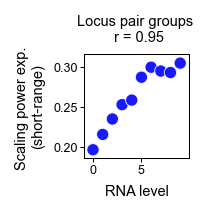

meta NOT subset; don't know how to subset; dropped


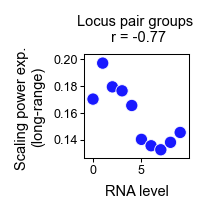

In [31]:

grange_list = ['short_range', 'long_range']

from scipy.stats import pearsonr, spearmanr

for _range in grange_list:
    fig, ax =plt.subplots(1, 1,figsize=(0.9,0.9), dpi=150)

    x_col, y_col = 'activity_level',f'{_range}_k'
    sns.scatterplot(data = scaling_summary_df, x=x_col, y=y_col, 
                    s=35,alpha=0.9,
                    ax=ax, 
                    hue='activity', 
                    palette=RNA_color_dict, 
                    legend=False)

    ax.set_ylabel(f"Scaling power exp. \n({_range.replace('_', '-')})", fontsize=7)
    ax.set_xlabel('RNA level', fontsize=7)

    #plt.legend(bbox_to_anchor=(1.02, 1.04), loc='upper left', ncols=3, borderaxespad=1,fontsize=_font_size)

    r_val = spearmanr(scaling_summary_df[x_col].values, scaling_summary_df[y_col].values, nan_policy='omit')[0]

    ax.set_title(f'Locus pair groups \n r = {round(r_val,2)}', fontsize=7)
    ax.margins(0.1)
    ax.tick_params(axis='both', which='both', labelsize = 6,
                         length=2, width=0.5, pad=1, 
                         direction='out', bottom=True, left=True
                        #labelleft=True, labelbottom=True,labelright=False, labeltop=False,
                           )
    [i[1].set_linewidth(0.5) for i in ax.spines.items()]

    #plt.ylim([0.2,1.5])
    #plt.xlim([1,1.5])

    #plt.tight_layout()
    plt.savefig(os.path.join(output_figure_folder,f"scatter_scaling_vs_RNA_byLoc_{_range.replace('_', '-')}_sameColor.pdf"),
            transparent=True, bbox_inches='tight', pad_inches=0.2, dpi=300)
    plt.show()